# Perceptrón: Caso práctico I

## Dataset

El conjunto de datos flor Iris o conjunto de datos iris de Fisher es un conjunto de datos multivariante introducido por Ronald Fisher en su artículo de 1936, _The use of multiple measurements in taxonomic problems_ (El uso de medidas múltiples en problemas taxonómicos) como un ejemplo de análisis discriminante lineal. A veces, se llama Iris conjunto de datos de Anderson porque Edgar Anderson coleccionó los datos para cuantificar la variación morfológica de la flor Iris de tres especies relacionadas. Dos de las tres especies se coleccionaron en la Península de la Gaspesia «todos son de la misma pastura, y recolectado el mismo día y medidos al mismo tiempo por la misma persona con el mismo aparato».

El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

## Enunciado

En este ejercicio vamos utilizar el conjunto de datos Iris para evaluar el funcionamiento del perceptrón y visualizar las capacidades que nos proporciona a la hora de clasificar diferentes categorías dentro de un conjunto de datos.

## 1. Lectura del conjunto de datos

In [4]:
from sklearn.datasets import load_iris

In [5]:
# Cargamos el conjunto de datos
iris_dataset = load_iris()

In [6]:
# Visualizamos las etiquetas del conjunto de datos
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
#imprimimos los valores de data set con el metodo ".data"
iris_dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
# Leemos el conjunto de datos con la libreria Pandas
import pandas as pd
import numpy as np
#                     valores de la caracteritica de entrada
#                                           valores de la caracteritica de salida
df = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target']], 
#                                       nombre de las columnas           
                  columns = iris_dataset['feature_names'] + ['target'])
#                                                       caracteristica de salida     
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2. Visualización del conjunto de datos

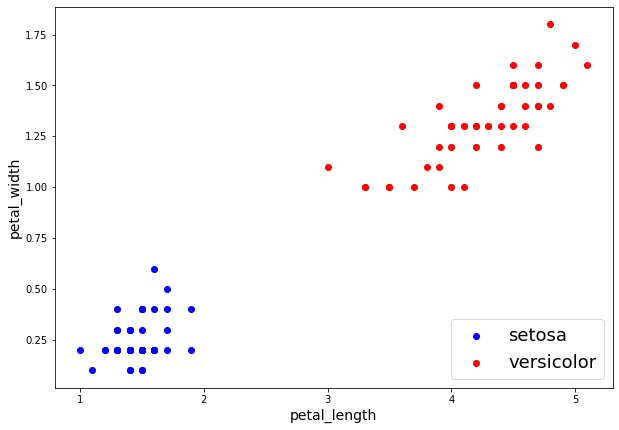

In [9]:
# Representacion grafica de dos dimensiones del conjunto de datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))

#es de 2 dimensiones por eso solo se toman en cuenta "petal length" y "petal width"

#se colocan 2 "plt.scatter" para superponer las graficas cuando se visualizen
plt.scatter(df["petal length (cm)"][df["target"] == 0], 
            #                                       "c" es color   "label" a que etiqueta corresponden
            df["petal width (cm)"][df["target"] == 0], c="b", label="setosa")

plt.scatter(df["petal length (cm)"][df["target"] == 1], 
            #                                       lo que esta entre comillas son solo texto
            df["petal width (cm)"][df["target"] == 1], c="r", label="versicolor")

#Eje horizontal
plt.xlabel("petal_length", fontsize=14)
#Eje vertical
plt.ylabel("petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=18)

plt.show()

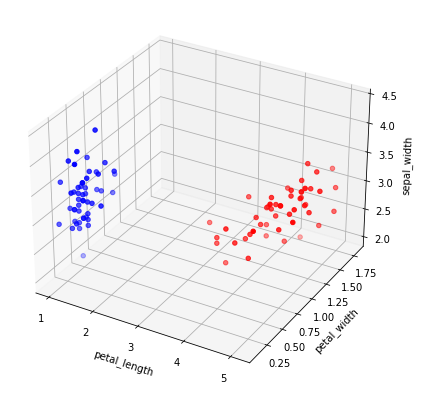

In [10]:
# Representacion grafica de 3 dimensiones del conjunto de datos
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

#es de 3 dimensiones, pero NO esta representando las 3 clases que usamos para el ejemplos
#las 3 dimensiones son las columnas

#configuramos la visualizacion de los valores de los datos
ax.scatter3D(df["petal length (cm)"][df["target"] == 0], 
            df["petal width (cm)"][df["target"] == 0], 
            df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1], 
            df["petal width (cm)"][df["target"] == 1], 
            df["sepal width (cm)"][df["target"] == 1], c="r")

#Configuramos las etiquetas de los vectores "x" y "y"
#Los Datos se asignan segun lo que este entre "comillas"
ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")


plt.show()

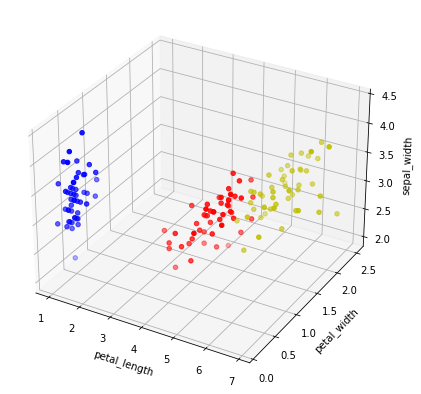

In [9]:
# Representacion grafica de 3 dimensiones con las 3 clasificaciones del conjunto de datos
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(df["petal length (cm)"][df["target"] == 0], 
            df["petal width (cm)"][df["target"] == 0], 
            df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1], 
            df["petal width (cm)"][df["target"] == 1], 
            df["sepal width (cm)"][df["target"] == 1], c="r")

ax.scatter3D(df["petal length (cm)"][df["target"] == 2], 
            df["petal width (cm)"][df["target"] == 2], 
            df["sepal width (cm)"][df["target"] == 2], c="y")

ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")

plt.show()

## 3. Entrenamiento del algoritmo

In [32]:
# Reducimos el conjunto de datos para entrenar el algoritmo y visualizar el resultado
# reducimos a "petal length" y "petal width (cm)"
df_reduced = df[["petal length (cm)", "petal width (cm)", "target"]]
#                                    reducimos tambien la clasificación en valores 0 y 1            
df_reduced = df_reduced.loc[df_reduced["target"].isin([0, 1])]
df_reduced

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
95,4.2,1.2,1.0
96,4.2,1.3,1.0
97,4.3,1.3,1.0
98,3.0,1.1,1.0


In [33]:
# Separamos las etiquetas de salida del resto de caracteristicas del conjunto de datos
# Solo tomamos en cuenta la etiqueta se salida
X_df = df_reduced[["petal length (cm)", "petal width (cm)"]]
y_df = df_reduced["target"]

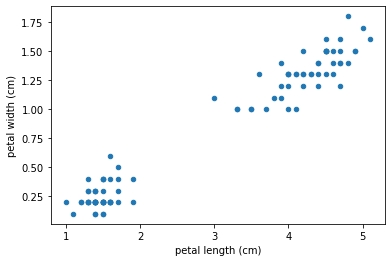

In [36]:
# Visualizamos el conjunto de datos de entrenamiento reducido

#solo estamos isualizando los valores en X
X_df.plot.scatter("petal length (cm)", "petal width (cm)")
plt.show()

In [38]:
#aqui visualizamos son y
y_df

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Name: target, Length: 100, dtype: float64

In [44]:
#aqui esta el algoritmo de entrenamiento
#los algoritmos ya estan en las librerias optimizados, solo usamos las funciones para manipular datos

from sklearn.linear_model import Perceptron
#El perceptron construye un modelo lineal

#le asignamos a "clf" el perceptron
clf = Perceptron(max_iter=1000, random_state=40)
# El entrenamiento del algoritmo consite en aplicar el metodo "fit" sobre nuestro conjunto de datos:
#    "X_df" = conjunto de datos de entrada    y   "y_df" = conjunto de datos de salida
clf.fit(X_df, y_df)
# Entrenar consite en buscar los parametros w1, w2 y b 
# Los mejores parametros que se ajustan o contruyen ese limite decision (funcion) para clasificar el DF.

Perceptron(random_state=40)

## Visualizacion del limite de decision construido por el algoritmo

In [45]:
# FUNCION DE AGREGACION z(x) = 
#                          x1*w1 + x2*w2 + b = x1*0.9 + x2*1.3 + (-3)  .-. hw(x)

#clf es el nombre de nuestro entrenamiento


In [46]:
# Parametros del modelo = w1, w2 : se accede a ellos con el atributo ".coef_" (coeficiente)
clf.coef_

array([[0.9, 1.3]])

In [47]:
# Terminio de interceptacion = b : se accede a el con el atributo ".intercept_" (intercepcion)
clf.intercept_

array([-3.])

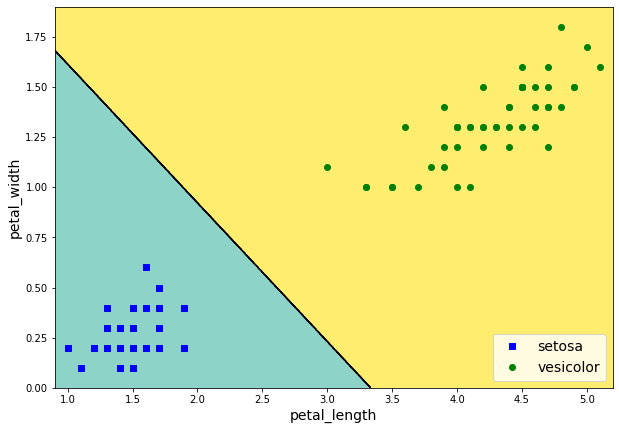

In [48]:
# Representacion grafica del limite de decision (funcion matematica)
import numpy as np

#Las valores de entrada los almacenamos en "X"
X = X_df.values

#Guarda el valor maximo y minimo 
mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

#Con base al minimo y el maximo se calcula valores intermedios (en este caso 1000 valores)
#Estos datos los almacenamos en 2 arrays un en "xx" y otro en "yy"
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                    np.linspace(mins[1], maxs[1], 1000))

#NO ENTIENDO
# Para predecir se una el metodo "predict"
# Se realiza un prediccion para los 1000 valores en xx y yy
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Tamaño de grafica
fig = plt.figure(figsize=(10, 7))

#NO ENTIENDO
# Se representa un funcion matematica con el metodo "contourf"
plt.contourf(xx, yy, Z, cmap="Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

#MEDIO ENTIENDO
#SUPERPONE LA VISUALIZACION DE DATOS
plt.plot(X[:, 0][y_df==0], X[:, 1][y_df==0], 'bs', label="setosa")
plt.plot(X[:, 0][y_df==1], X[:, 1][y_df==1], 'go', label="vesicolor")

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

#EL PERCEPTRON construye UN LIMITE DE DECISION (funcion(linea negra))
# Esta es de acuerdo a z(x) = x1*w1 + x2*w2 + b = x1*0.9 + x2*1.3 + (-3)
#como intuiciones... el limite de decision es lineal

In [55]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=1000, random_state=40)
clf.fit(X_df, y_df)

Perceptron(random_state=40)

In [56]:
y_pred = clf.predict(X_df)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_df, y_pred)

1.0